## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.385405 -1.164012 -0.108605 -1.615570  0.852771 -1.413414
1  1.726637 -0.449800  0.467997  1.797466 -0.141429  1.553110
2  0.333999  0.700684 -1.492498 -0.867013 -0.003534  0.791218
3 -0.985500  0.554037 -0.103697  1.156046 -0.098462  0.154577
4  0.478275  0.263395 -1.174501 -0.442669 -0.574922  0.500322


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9745461	total: 58.1ms	remaining: 58.1s
1:	learn: 0.9680544	total: 58.8ms	remaining: 29.4s
2:	learn: 0.9585110	total: 59.5ms	remaining: 19.8s
3:	learn: 0.9480859	total: 61.2ms	remaining: 15.2s
4:	learn: 0.9392856	total: 61.7ms	remaining: 12.3s
5:	learn: 0.9303911	total: 62.1ms	remaining: 10.3s
6:	learn: 0.9212105	total: 62.5ms	remaining: 8.86s
7:	learn: 0.9132539	total: 62.8ms	remaining: 7.79s
8:	learn: 0.9047502	total: 63.2ms	remaining: 6.96s
9:	learn: 0.8962682	total: 63.6ms	remaining: 6.29s
10:	learn: 0.8866516	total: 64ms	remaining: 5.75s
11:	learn: 0.8785143	total: 64.4ms	remaining: 5.3s
12:	learn: 0.8697492	total: 64.7ms	remaining: 4.91s
13:	learn: 0.8620973	total: 65ms	remaining: 4.58s
14:	learn: 0.8546167	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8472537	total: 65.6ms	remaining: 4.03s
16:	learn: 0.8389955	total: 65.9ms	remaining: 3.81s
17:	learn: 0.8309327	total: 66.2ms	remaining: 3.61s
18:	learn: 0.8239741	total: 66.5ms	remaining: 3.4

106:	learn: 0.3846148	total: 99.5ms	remaining: 830ms
107:	learn: 0.3817287	total: 99.9ms	remaining: 825ms
108:	learn: 0.3791044	total: 100ms	remaining: 821ms
109:	learn: 0.3761577	total: 101ms	remaining: 817ms
110:	learn: 0.3726455	total: 101ms	remaining: 811ms
111:	learn: 0.3695251	total: 102ms	remaining: 807ms
112:	learn: 0.3667043	total: 102ms	remaining: 803ms
113:	learn: 0.3645297	total: 103ms	remaining: 800ms
114:	learn: 0.3617938	total: 103ms	remaining: 795ms
115:	learn: 0.3591810	total: 104ms	remaining: 791ms
116:	learn: 0.3561349	total: 104ms	remaining: 787ms
117:	learn: 0.3537654	total: 105ms	remaining: 783ms
118:	learn: 0.3516756	total: 105ms	remaining: 779ms
119:	learn: 0.3482159	total: 106ms	remaining: 776ms
120:	learn: 0.3458670	total: 106ms	remaining: 773ms
121:	learn: 0.3434717	total: 107ms	remaining: 769ms
122:	learn: 0.3413348	total: 107ms	remaining: 766ms
123:	learn: 0.3386017	total: 108ms	remaining: 764ms
124:	learn: 0.3355235	total: 109ms	remaining: 761ms
125:	learn

286:	learn: 0.1002112	total: 181ms	remaining: 450ms
287:	learn: 0.0994126	total: 182ms	remaining: 450ms
288:	learn: 0.0987014	total: 183ms	remaining: 449ms
289:	learn: 0.0981573	total: 183ms	remaining: 448ms
290:	learn: 0.0973337	total: 183ms	remaining: 447ms
291:	learn: 0.0965812	total: 184ms	remaining: 446ms
292:	learn: 0.0959887	total: 184ms	remaining: 445ms
293:	learn: 0.0952533	total: 185ms	remaining: 444ms
294:	learn: 0.0946150	total: 185ms	remaining: 443ms
295:	learn: 0.0939251	total: 186ms	remaining: 442ms
296:	learn: 0.0932000	total: 187ms	remaining: 442ms
297:	learn: 0.0926760	total: 187ms	remaining: 441ms
298:	learn: 0.0920763	total: 188ms	remaining: 440ms
299:	learn: 0.0915092	total: 188ms	remaining: 439ms
300:	learn: 0.0909635	total: 189ms	remaining: 438ms
301:	learn: 0.0904273	total: 189ms	remaining: 438ms
302:	learn: 0.0897751	total: 190ms	remaining: 437ms
303:	learn: 0.0891372	total: 190ms	remaining: 436ms
304:	learn: 0.0884246	total: 191ms	remaining: 435ms
305:	learn: 

450:	learn: 0.0417082	total: 271ms	remaining: 330ms
451:	learn: 0.0415594	total: 272ms	remaining: 330ms
452:	learn: 0.0413987	total: 272ms	remaining: 329ms
453:	learn: 0.0412508	total: 273ms	remaining: 328ms
454:	learn: 0.0409764	total: 273ms	remaining: 327ms
455:	learn: 0.0407077	total: 274ms	remaining: 327ms
456:	learn: 0.0404445	total: 274ms	remaining: 326ms
457:	learn: 0.0401865	total: 275ms	remaining: 325ms
458:	learn: 0.0399641	total: 275ms	remaining: 324ms
459:	learn: 0.0397316	total: 276ms	remaining: 324ms
460:	learn: 0.0394827	total: 276ms	remaining: 323ms
461:	learn: 0.0392792	total: 277ms	remaining: 322ms
462:	learn: 0.0390793	total: 277ms	remaining: 321ms
463:	learn: 0.0388482	total: 277ms	remaining: 320ms
464:	learn: 0.0386548	total: 278ms	remaining: 320ms
465:	learn: 0.0384594	total: 278ms	remaining: 319ms
466:	learn: 0.0382691	total: 279ms	remaining: 318ms
467:	learn: 0.0381303	total: 279ms	remaining: 317ms
468:	learn: 0.0380012	total: 279ms	remaining: 316ms
469:	learn: 

665:	learn: 0.0155702	total: 356ms	remaining: 179ms
666:	learn: 0.0154739	total: 357ms	remaining: 178ms
667:	learn: 0.0154027	total: 357ms	remaining: 178ms
668:	learn: 0.0153186	total: 358ms	remaining: 177ms
669:	learn: 0.0152367	total: 358ms	remaining: 176ms
670:	learn: 0.0151690	total: 358ms	remaining: 176ms
671:	learn: 0.0150598	total: 359ms	remaining: 175ms
672:	learn: 0.0149529	total: 359ms	remaining: 174ms
673:	learn: 0.0148765	total: 359ms	remaining: 174ms
674:	learn: 0.0148063	total: 359ms	remaining: 173ms
675:	learn: 0.0147301	total: 360ms	remaining: 173ms
676:	learn: 0.0146575	total: 361ms	remaining: 172ms
677:	learn: 0.0145456	total: 361ms	remaining: 171ms
678:	learn: 0.0144603	total: 361ms	remaining: 171ms
679:	learn: 0.0143997	total: 362ms	remaining: 170ms
680:	learn: 0.0143409	total: 362ms	remaining: 170ms
681:	learn: 0.0142569	total: 363ms	remaining: 169ms
682:	learn: 0.0141759	total: 363ms	remaining: 168ms
683:	learn: 0.0141208	total: 363ms	remaining: 168ms
684:	learn: 

912:	learn: 0.0054833	total: 450ms	remaining: 42.9ms
913:	learn: 0.0054617	total: 451ms	remaining: 42.4ms
914:	learn: 0.0054264	total: 451ms	remaining: 41.9ms
915:	learn: 0.0054077	total: 452ms	remaining: 41.4ms
916:	learn: 0.0053904	total: 452ms	remaining: 40.9ms
917:	learn: 0.0053515	total: 453ms	remaining: 40.4ms
918:	learn: 0.0053334	total: 453ms	remaining: 40ms
919:	learn: 0.0053163	total: 454ms	remaining: 39.5ms
920:	learn: 0.0053058	total: 454ms	remaining: 38.9ms
921:	learn: 0.0052833	total: 454ms	remaining: 38.4ms
922:	learn: 0.0052656	total: 455ms	remaining: 37.9ms
923:	learn: 0.0052400	total: 455ms	remaining: 37.5ms
924:	learn: 0.0052026	total: 456ms	remaining: 36.9ms
925:	learn: 0.0051800	total: 456ms	remaining: 36.4ms
926:	learn: 0.0051598	total: 456ms	remaining: 35.9ms
927:	learn: 0.0051496	total: 457ms	remaining: 35.4ms
928:	learn: 0.0051397	total: 457ms	remaining: 34.9ms
929:	learn: 0.0051118	total: 457ms	remaining: 34.4ms
930:	learn: 0.0051000	total: 458ms	remaining: 33

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

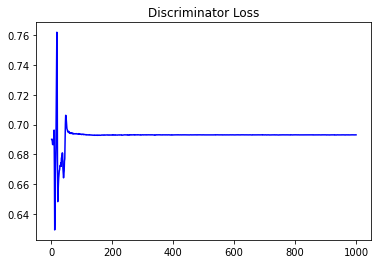

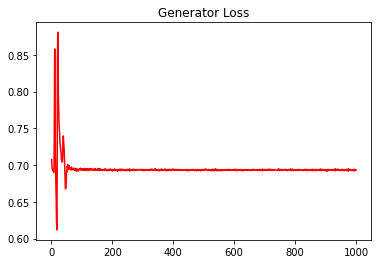

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.21616406452989204


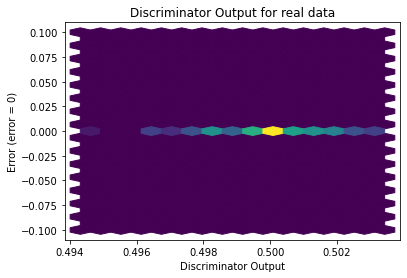

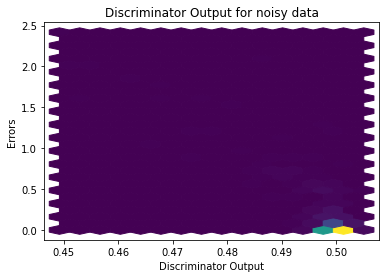

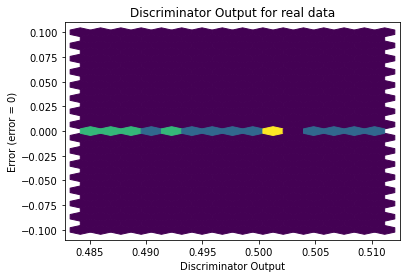

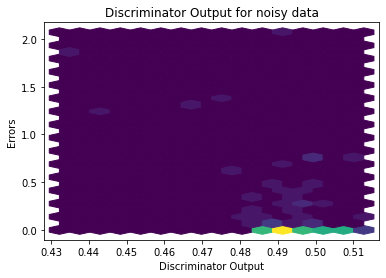

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


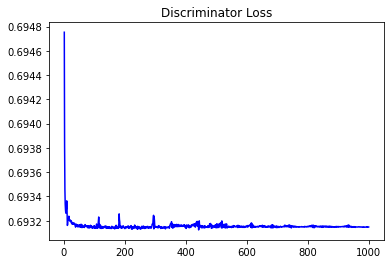

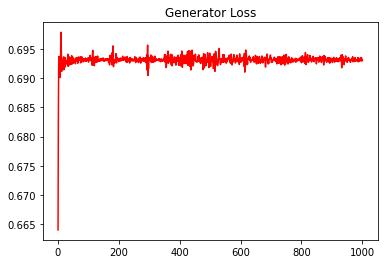

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2416513917361873


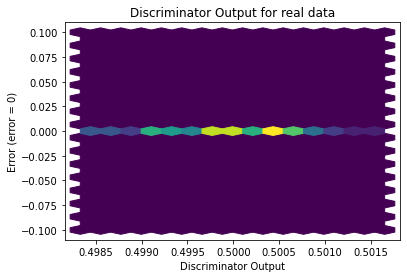

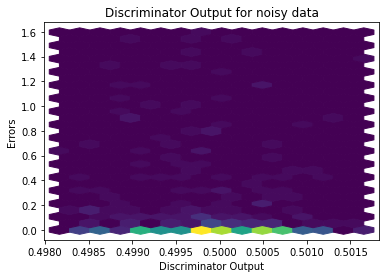

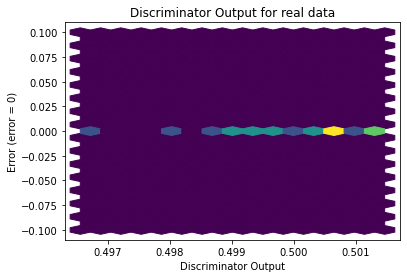

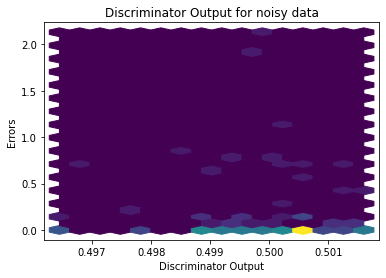

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0170]], requires_grad=True)
